In [2]:
homedir <- '/Users/chenlingantelope/ResearchProjects/scRNA_simulation/'
setwd(homedir)
required_packages <- c('devtools','FNN','reshape','ggplot2','gridExtra','ape','MASS','Rtsne','RColorBrewer','fAsianOptions','fOptions','fBasics','timeSeries','timeDate','Biobase','repr' )
install_packages <- rownames(installed.packages())
need_install <- setdiff(required_packages,install_packages)
if(length(need_install)>0){install.packages(need_install)}
library('ape')
library('phytools')
load_result <- lapply(required_packages, require, character.only = TRUE)

load('allsim.20170706.robj')
load('match_params.robj')

load_all('SCsimR')
options(repr.plot.width=5, repr.plot.height=4)
ngenes=1000
ncells=1000
nevf=10
randseed=0


Loading required package: maps
Loading required package: devtools
Loading required package: FNN
Loading required package: reshape
Loading required package: ggplot2
Loading required package: gridExtra
Loading required package: MASS
Loading required package: Rtsne
Loading required package: RColorBrewer
Loading required package: fAsianOptions
Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org
Loading required package: fOptions


Rmetrics Package fOptions
Pricing and Evaluating Basic Options
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rme

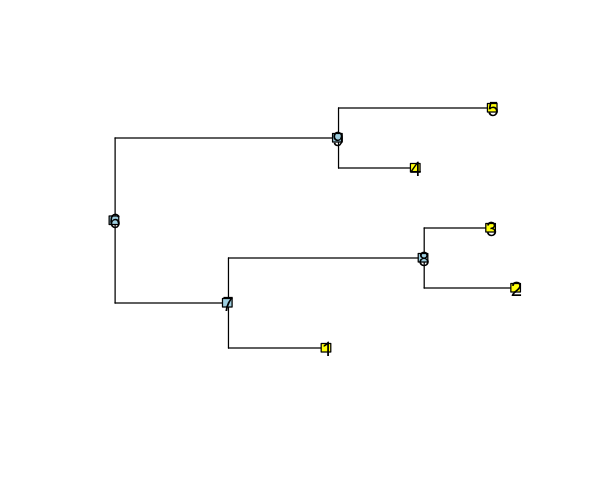

In [8]:
source('ContinuousTree.R')
ncells <- 10000
ntips <- 10
Sigma <- 1
evfs_wimpuls <- ImpulseEVF(5,Sigma)

In [9]:
evf1 <- evfs_wimpuls[[1]]
ncells <- length(evf1[,1])

In [10]:
evf_mean <- rep(0,5)
evf_sd <- rep(1,5)
bimod <- 0.5
evf2<- lapply(c(1:length(evf_mean)),function(evfi){
    lapply(c(1:ncells),function(celli){
        evf <- sapply(c(1:length(evf_mean)),function(evfi){rnorm(1,evf_mean[evfi],evf_sd[evfi])})
        return(evf)
    })
})
evf2 <- do.call(cbind,evf2)

In [11]:
evfs <- cbind(evf1[,4],evf2)

In [12]:
gene_effects <- GeneEffects(ngenes=ngenes,nevf=6,randseed=0,sd=1,prob=0.3)

In [22]:
dim(gene_effects[[1]])
dim(evfs)
class(evfs)
head(evfs)
class(gene_effects[[1]])
mode(gene_effects[[1]])

[1] 1000    6

[1] 10007     6

[1] "matrix"

0.2033492,"0.97596307, 0.15162986, 1.49073114, 0.04939074, -0.43018409","0.2490513, -0.3668392, 0.2801381, -0.6211905, -0.4010516","1.396161709, -0.960835043, 0.733868761, -0.004301402, -0.034578012","-0.3580763, -0.6112448, -1.4939213, -0.8556414, 3.1020184","0.7108090, -0.9025279, 0.9401624, 0.6329699, 0.4623659"
0.203501,"0.3409891, 0.5480757, 2.0354081, -1.5990050, 1.2842210","-0.6683215, -0.9962549, 0.3738032, 0.9282107, 1.4957200","-1.4653373, -0.9875277, -0.3490980, 2.6033322, -3.0116385","1.1873208, -1.8096873, -0.8614765, 0.5112874, 0.8775819","0.7549890, -0.7363418, 0.5359445, 1.5544757, 0.6877708"
0.2039327,"-0.4921929, 0.5596704, -2.2880588, 0.9115954, -0.3547244","-0.6043283, 0.4612238, -0.8304730, -0.3750689, -0.4836119","-1.3324006, 0.3606054, 1.3113741, 1.6804546, -0.1882245","-0.9776334, 0.3075954, -0.4311832, -0.1198652, 0.6742864","0.03726825, -1.33407938, 1.59735328, 0.07013639, 1.72417425"
0.2042557,"1.4298713, -2.2612819, 2.1293359, 0.5231506, -0.2156310","1.1449252, 0.9940431, -0.1207337, -0.6879993, -0.7497205","-1.077310037, 0.600160799, 0.450025825, 1.126058706, 0.001919053","-0.65559077, -1.16904208, 0.55412910, -0.71204248, -0.08090824","-0.7054435, -0.1142400, 0.5024900, 1.1079893, 1.4223279"
0.2043065,"0.1604635, 0.4735367, -0.1664596, 1.8497341, -0.5902492","0.64684430, -0.13806687, -0.21981174, -0.01664738, -2.14318897","-1.4602234, 0.4803844, -0.6264879, 2.0981591, -0.1555205","-0.4510154, 0.8040467, -0.2943782, -0.6763046, -0.8030963","-0.5699665, -1.2535561, 2.3002971, 0.5722625, 0.3504708"
0.2046097,"-0.4851246, -1.3676415, -1.5249722, 0.8968871, -1.3517274","-0.4607476, 1.4811136, -1.1571055, -1.4621360, -1.0657535","-0.8202498, -1.0204941, -0.4586710, 0.4665742, 0.8073561","1.69396962, -0.22675327, -0.53505930, -1.26878245, 0.03167724","0.4160046, -0.2670632, -1.4143935, 1.3232394, 0.8299809"


[1] "matrix"

[1] "numeric"

ERROR: Error in as.matrix(evfs) %*% as.matrix(gene_effects[[1]]): requires numeric/complex matrix/vector arguments


In [ ]:
true_counts <- lapply(c(1:ncells),function(celli){
    true_counts <- EVF2TrueCounts(allparams,matched_params,sim_master,evfs[[celli]],gene_effects,bimod)
    return(true_counts)
})

In [ ]:
true_counts <- do.call(cbind,true_counts)
sampled_counts <- TrueCounts2Dropped(true_counts,alpha,alpha_sd)
biased_counts <- Dropped2Biased(sampled_counts,nbins,randseed,gcbias,lenbias,batch,noise)